In [ ]:
# Instalacion 
# !pip install keras
# !pip install tensorflow


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_3 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                346176    
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                      

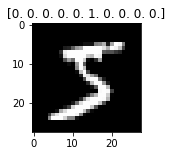

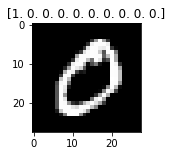

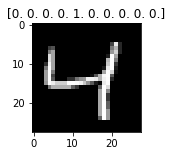

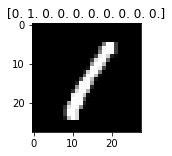

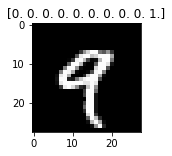

In [14]:
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import sys

import numpy as np
from tensorflow import keras
#from tensorflow.keras.models import layers
import matplotlib.pyplot as plt
import pandas as pd


# PREPARE DATA
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale data to [0,1] range
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# Make sure images have shape (28,28,1)
x_train=np.expand_dims(x_train, -1)
x_test=np.expand_dims(x_test, -1)

# convert class vectors to binary class matrices
num_clases = 10
y_train = keras.utils.to_categorical(y_train, num_clases)
y_test = keras.utils.to_categorical(y_test, num_clases)



'''''
# plot the first image in the training set and print the class name once at a time
n=5
for i in range(n):
    plt.figure(figsize=(20,2))
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.show()
'''''

# create clasification model as convolutional neural network (CNN) with sequential model
model = Sequential()

# add convolutional layer with 32 filters and size of 5x5
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

#compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

# use the model to predict the class of the test set
predictions = model.predict(x_test)
print(predictions)

# plot  first image in the test set and print the class name once at a time
n=5
for i in range(n):

    plt.figure(figsize=(20,2))
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.show()